First name : Adrien Last name : Montaigne SID : 2248806

**Step I : Import libriaries and dataset**

In [27]:
import pandas as pd
import numpy as np
import tensorflow 
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
dataset = pd.read_csv("titanic.csv")

**Step II: Split it into Test and Train**

In [28]:
from sklearn.model_selection import train_test_split

Y = dataset.iloc[:,1]
X = dataset.iloc[:,2:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [29]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Step III : Data Encoding**

In [30]:
X_train["Sex"] = X_train["Sex"].replace('male', 1)
X_test["Sex"] = X_test["Sex"].replace('male', 1)
X_train["Sex"] = X_train["Sex"].replace('female', 0)
X_test["Sex"] = X_test["Sex"].replace('female', 0)

In [31]:
X_train["Embarked"] = X_train["Embarked"].replace('C', 0)
X_train["Embarked"] = X_train["Embarked"].replace('Q', 1)
X_train["Embarked"] = X_train["Embarked"].replace('S', 2)
X_test["Embarked"] = X_test["Embarked"].replace('C', 0)
X_test["Embarked"] = X_test["Embarked"].replace('Q', 1)
X_test["Embarked"] = X_test["Embarked"].replace('S', 2)

**Step IV : Deal with missing values**

In [32]:
print(X_train.isnull().sum())

Pclass        0
Name          0
Sex           0
Age         144
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       547
Embarked      2
dtype: int64


In [33]:
X_train.Embarked = X_train.Embarked.fillna('2')
X_test.Embarked = X_test.Embarked.fillna('2')

In [34]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Imputer.fit(X_train[["Age"]])
X_train[["Age"]] = Imputer.transform(X_train[["Age"]])
Imputer.fit(X_test[["Age"]])
X_test[["Age"]] = Imputer.transform(X_test[["Age"]])

**Step V : Removing columns**

In [35]:
X_train = X_train.drop(["Name","Cabin","Ticket"], axis=1)
X_test = X_test.drop(["Name","Cabin","Ticket"], axis=1)

**Step VI : Standardising data - Feature normalisation**

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Step VII : Random forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

**Step VIII : Evaluation**

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
result=clf.predict(X_test)
cm = confusion_matrix(Y_test, result)
print(cm)
print(accuracy_score(Y_test, result))
print(f1_score(Y_test, result))


[[95 11]
 [21 52]]
0.8212290502793296
0.7647058823529411


**Step IX : Data visualisation**

Feature Importance

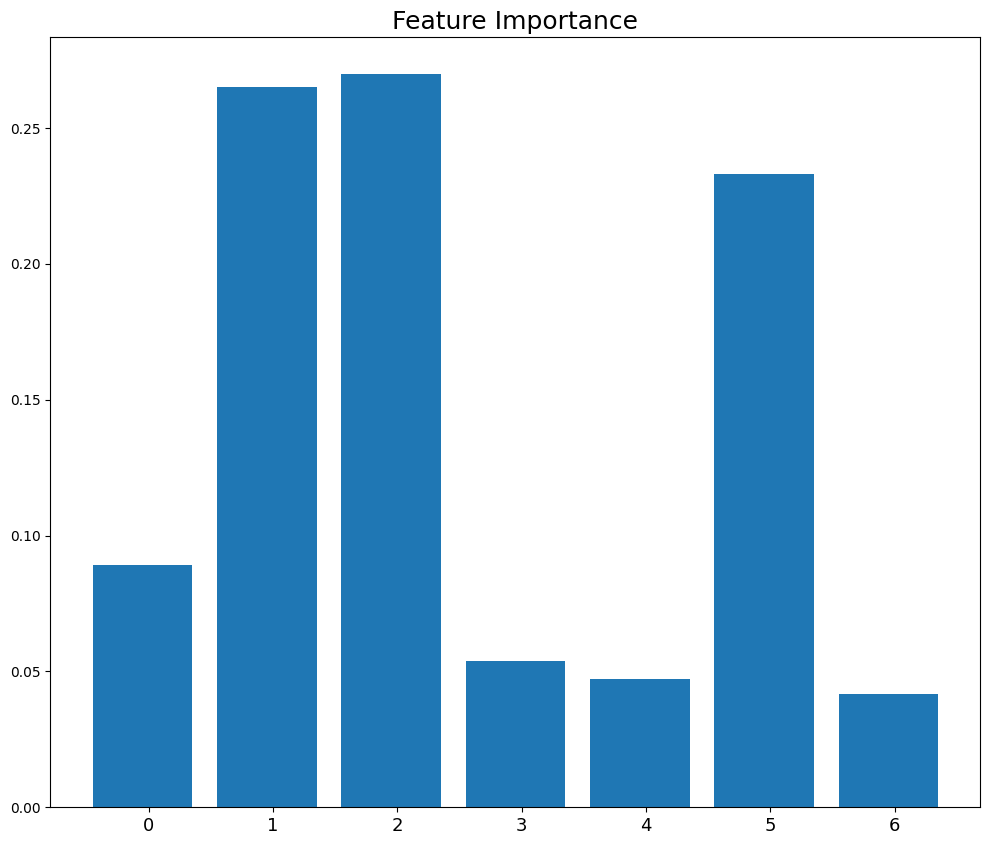

In [39]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
X_train = pd.DataFrame(X_train)
Names= X_train.columns
f = plt.figure(figsize=(12, 10))
importance = clf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([r + 0.1 / 2 for r in range(len(importance))],Names,fontsize = 13)
plt.title("Feature Importance", fontsize = 18)
pyplot.show()

**Step X: The optimal n**

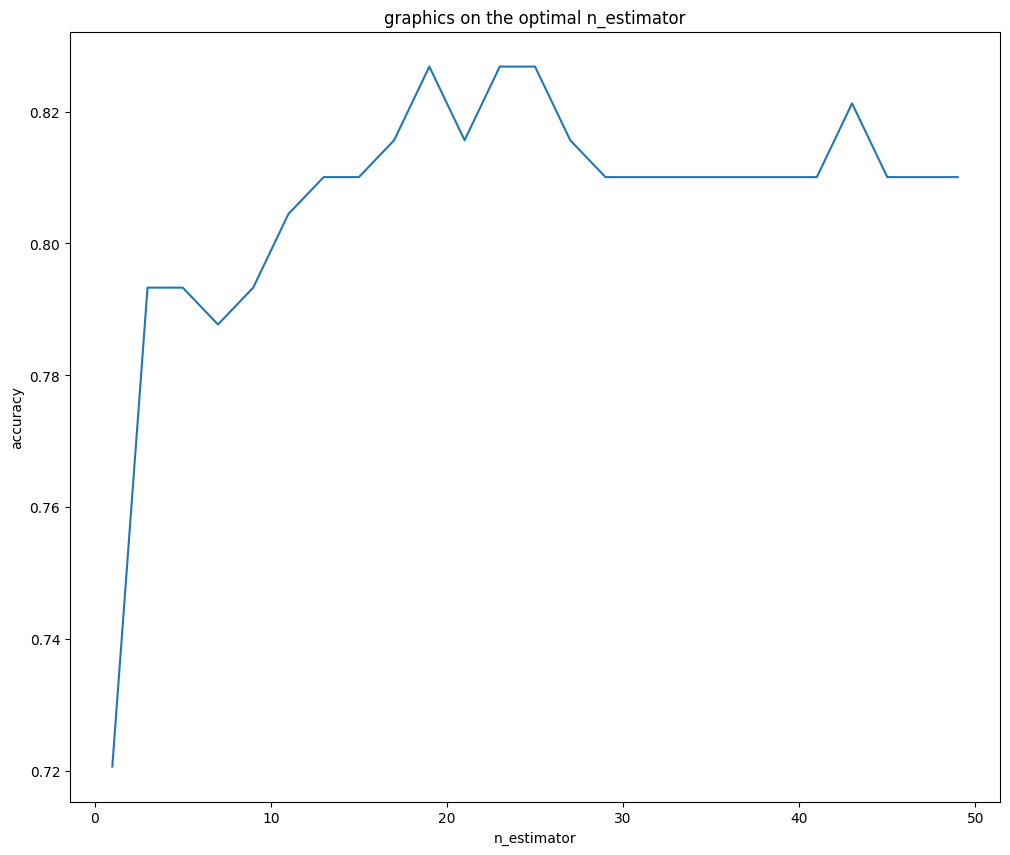

In [40]:
from sklearn import metrics
interval = np.arange(1,50, 2)
accuracy = []

for n in interval:
    clf.set_params(n_estimators=n, )
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, y_pred))
f = plt.figure(figsize=(12, 10))
plt.title("graphics on the optimal n_estimator")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(interval, accuracy);

**Step XI : Correlation Matrix**

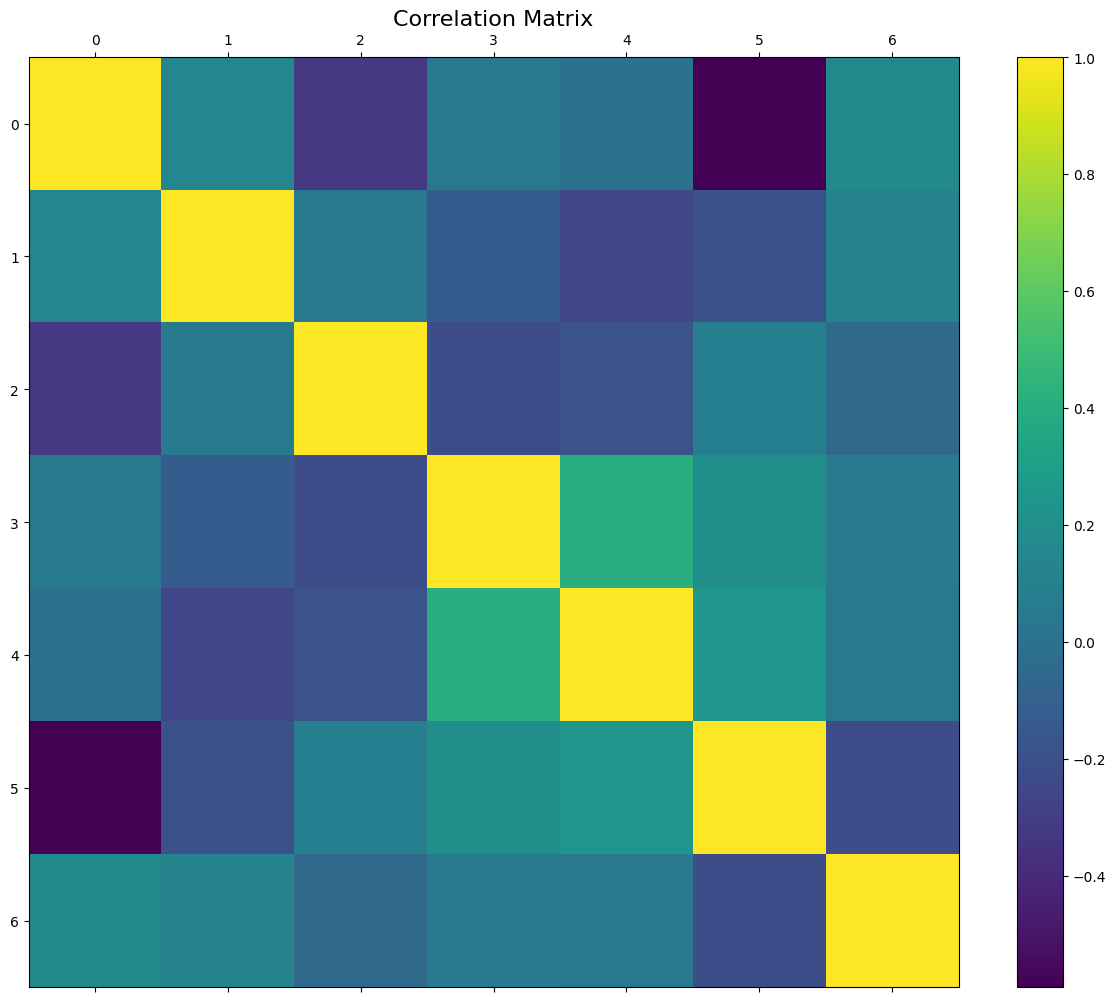

In [41]:
f = plt.figure(figsize=(15, 12))
plt.matshow(X_train.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [42]:
X_train

,0,1,2,3,4,5,6
0,0.836593,0.733346,-2.679755e-16,1.491053,-0.478173,-0.188014,-0.680137
1,-1.555593,-1.363612,-1.253865e-02,-0.489600,-0.478173,0.539690,-1.947828
2,-0.359500,-1.363612,2.891750e-01,-0.489600,-0.478173,-0.463503,0.587553
3,-0.359500,0.733346,-6.913943e-01,1.491053,-0.478173,0.897735,0.587553
4,-0.359500,0.733346,2.401170e+00,-0.489600,-0.478173,-0.463503,0.587553
...,...,...,...,...,...,...,...
707,0.836593,0.733346,-8.422512e-01,-0.489600,-0.478173,-0.525083,0.587553
708,0.836593,-1.363612,2.517556e-02,-0.489600,-0.478173,-0.522922,-0.680137
709,-0.359500,0.733346,-6.913943e-01,-0.489600,-0.478173,0.897735,0.587553
710,0.836593,-1.363612,-2.679755e-16,-0.489600,-0.478173,-0.527243,0.587553


**Step XII : Pie on the gender distribution**

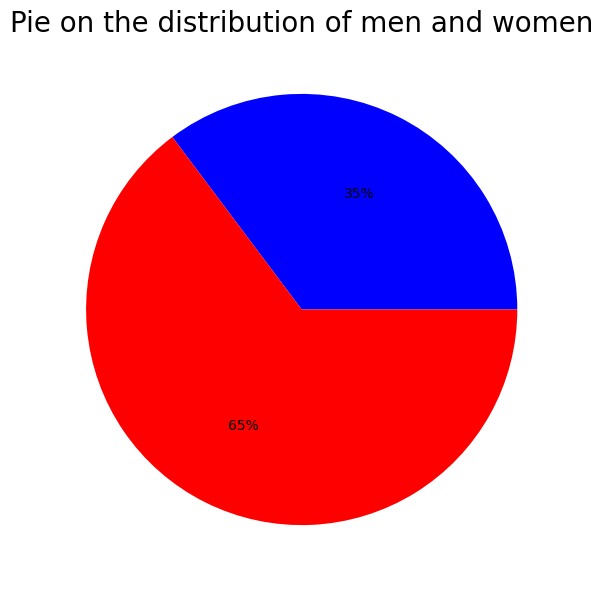

In [45]:
# we count the number of men and women
result = dataset.groupby('Sex')['PassengerId'].nunique()
f = plt.figure(figsize=(7, 7))
colors = ["blue","red"]
plt.pie(result, colors = colors, autopct = '%0.0f%%')
plt.title('Pie on the distribution of men and women', fontsize=20)
plt.show(f.number)



**Step XIII : Embarkation distribution**

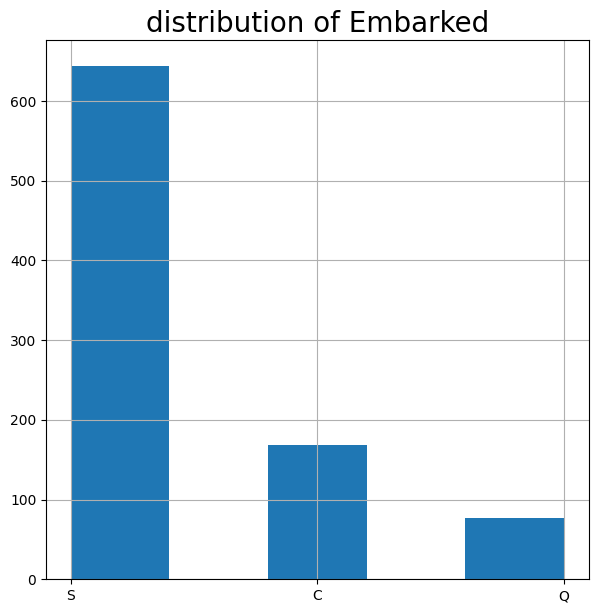

In [46]:
f = plt.figure(figsize=(7, 7))
plt.title('distribution of Embarked', fontsize=20)
hist = dataset["Embarked"].hist(bins=5)

**Step XIV : Pclass distribution**

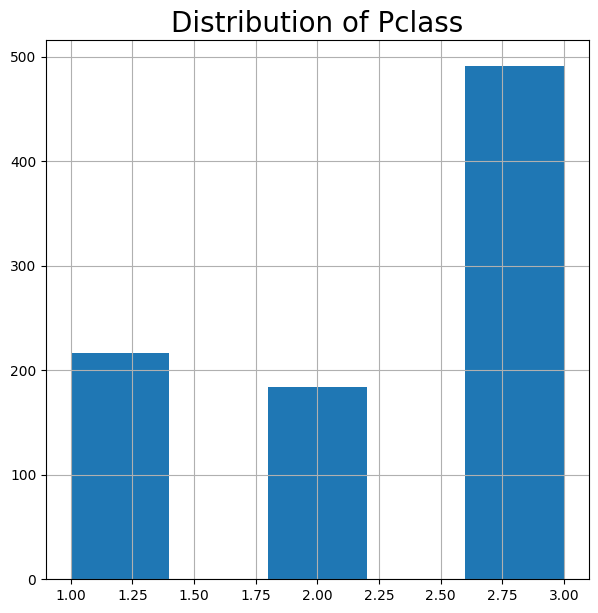

In [47]:
f = plt.figure(figsize=(7, 7))
plt.title('Distribution of Pclass', fontsize=20)
hist = dataset["Pclass"].hist(bins=5)